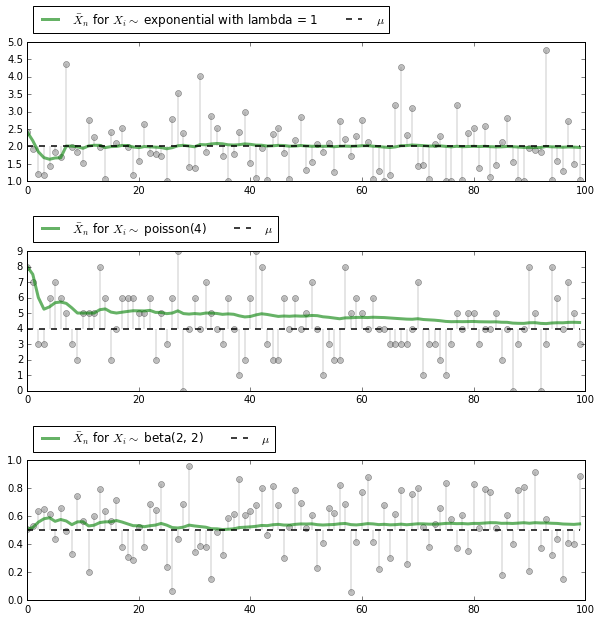

In [1]:
%matplotlib inline
"""
visual illustration of the law of large numbers
"""

import random
import numpy as np
from scipy.stats import t, beta, lognorm, expon, gamma, poisson
import matplotlib.pyplot as plt

n = 100

#==arbitrary collection of distribution==#
distributions = {"student's t with 10 degree of freedom": t(10),
                "beta(2, 2)": beta(2, 2),
                "lognormal LN(0, 1/2)": lognorm(0.5),
                "gamma(5, 1/2)": gamma(5, scale=2),
                "poisson(4)": poisson(4),
                "exponential with lambda = 1": expon(1)}

#==create a figure and some axes==#
num_plots = 3
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 10))

#==set some plotting parameters to improve layout==#
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
              'bbox_to_anchor': bbox,
              'loc': 3,
              'mode': 'expend'}
plt.subplots_adjust(hspace=0.5)

for ax in axes:
    #==choose a randomly selected distribution==#
    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)
    
    #==generate n draws from the distribution==#
    data = distribution.rvs(n)
    
    #==compute sample mean at each n==#
    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])
        
    #==plot==#
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = r'$\bar X_n$' + ' for ' + r'$X_i \sim$' + ' ' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label=r'$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args)
    
plt.show()

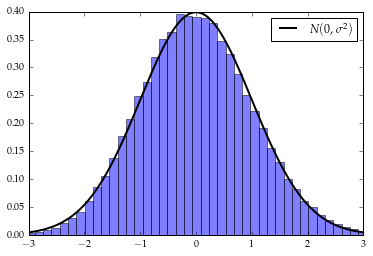

In [2]:
"""
visual illustration of the central limit theorem. histrograms draw of
    
    Y_n := \sqrt{n} (\bar X_n -\mu)
    
for a given distribution of X_i, and a given choice of n.
"""

from scipy.stats import norm
from matplotlib import rc

#specifying font, needs LaTex integration==#
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

#==set parameters==#
n = 250 #choice of n
k = 100000 # number of draws of Y_n
distribution = expon(2) #exponential distribution, lambda = 1/2
mu, s = distribution.mean(), distribution.std()

#==draw underlying RVs. Each row contains a draw of X_1, ..., X_n==#
data = distribution.rvs((k, n))
#==compute mean of each row, producing k draws of \bar X_n==#
sample_means = data.mean(axis=1)
#==generate observations of Y_n==#
Y=np.sqrt(n) * (sample_means - mu)

#==plot==#
fig, ax =plt.subplots()
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, normed=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, norm.pdf(xgrid, scale=s), 'k-', lw=2, label=r'$N(0, \sigma^2)$')
ax.legend()

plt.show()